In [20]:
import pandas as pd

df= pd.read_csv("Colombia_home_price_test.csv")

df.head()

,Id,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
0,0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
1,1,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,4.0,4.0,300.0,USD,1590000.0
2,2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0


In [3]:
df.columns

Index(['Id', 'pais', 'provincia_departamento', 'ciudad', 'property_type',
       'operation_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'currency', 'price'],
      dtype='object')

In [4]:
df.isnull().sum()

Id                        0
pais                      0
provincia_departamento    0
ciudad                    0
property_type             0
operation_type            0
rooms                     0
bedrooms                  0
bathrooms                 0
surface_total             0
currency                  0
price                     0
dtype: int64

In [5]:
df['pais'].value_counts()

Argentina    16892
Colombia      8768
Name: pais, dtype: int64

In [17]:
df['ciudad'].value_counts()

Bogotá D.C       3131
Rosario          1797
Mar del Plata    1725
Cali             1687
Barranquilla     1410
                 ... 
San Luis            1
Rivadavia           1
Azul                1
San Juan            1
Marsella            1
Name: ciudad, Length: 248, dtype: int64

In [29]:
df['provincia_departamento'].value_counts()

Capital Federal                 8846
Cundinamarca                    3291
Buenos Aires Costa Atlántica    1960
Santa Fe                        1888
Antioquia                       1689
Valle del Cauca                 1682
Bs.As. G.B.A. Zona Norte        1498
Atlántico                       1430
Bs.As. G.B.A. Zona Sur           792
Bs.As. G.B.A. Zona Oeste         656
Córdoba                          436
Name: provincia_departamento, dtype: int64

In [28]:
value_counts = df['provincia_departamento'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 200].index

# Keep rows where the city column is not in to_remove
df = df[~df.provincia_departamento.isin(to_remove)]

In [18]:
df['property_type'].value_counts()

Departamento    16892
Apartamento      8768
Name: property_type, dtype: int64

In [31]:
df['operation_type'].value_counts()

Venta    24168
Name: operation_type, dtype: int64

<AxesSubplot:>

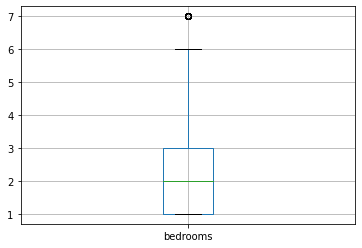

In [10]:
df.boxplot(column='bedrooms')

In [15]:
df['bedrooms'].value_counts()

1.0    10021
3.0     7746
2.0     6984
4.0      777
5.0       93
7.0       23
6.0       16
Name: bedrooms, dtype: int64

In [16]:
df['bathrooms'].value_counts()

1.0    13807
2.0     7732
3.0     2878
4.0      966
5.0      258
6.0       19
Name: bathrooms, dtype: int64

In [73]:
df['rooms'].value_counts()

3.0     10026
2.0      9474
4.0      2487
1.0      2422
5.0       551
6.0       210
7.0        59
8.0        21
9.0         7
10.0        5
12.0        2
11.0        1
Name: rooms, dtype: int64

In [41]:
cols_cat =['pais','provincia_departamento','ciudad','property_type']

df_new= pd.get_dummies(df[cols_cat],drop_first=True)

df_new

,pais_Colombia,provincia_departamento_Atlántico,provincia_departamento_Bs.As. G.B.A. Zona Norte,provincia_departamento_Bs.As. G.B.A. Zona Oeste,provincia_departamento_Bs.As. G.B.A. Zona Sur,provincia_departamento_Buenos Aires Costa Atlántica,provincia_departamento_Capital Federal,provincia_departamento_Cundinamarca,provincia_departamento_Córdoba,provincia_departamento_Santa Fe,provincia_departamento_Valle del Cauca,ciudad_Agronomía,ciudad_Agua de Dios,ciudad_Almagro,ciudad_Almirante Brown,ciudad_Anapoima,ciudad_Avellaneda,ciudad_Balvanera,ciudad_Barbosa,ciudad_Barracas,ciudad_Barranquilla,ciudad_Barrio Norte,ciudad_Belgrano,ciudad_Bello,ciudad_Berazategui,ciudad_Boca,ciudad_Boedo,ciudad_Bogotá D.C,ciudad_Buenaventura,ciudad_Caballito,ciudad_Cabrera,ciudad_Cajicá,ciudad_Cali,ciudad_Centro / Microcentro,ciudad_Chacarita,ciudad_Chía,ciudad_Coghlan,ciudad_Colegiales,ciudad_Congreso,ciudad_Constitución,ciudad_Copacabana,ciudad_Costa del Este,ciudad_Cota,ciudad_Córdoba,ciudad_El Carmen de Viboral,ciudad_Envigado,ciudad_Escobar,ciudad_Esperanza,ciudad_Esteban Echeverría,ciudad_Ezeiza,ciudad_Flores,ciudad_Floresta,ciudad_Funza,ciudad_Fusagasugá,ciudad_Gachancipá,ciudad_General Rodríguez,ciudad_General San Martín,ciudad_Girardot,ciudad_Girardota,ciudad_Granadero Baigorria,ciudad_Guarne,ciudad_Hurlingham,ciudad_Itagui,ciudad_Ituzaingó,ciudad_Jamundí,ciudad_José C Paz,ciudad_Juan de Acosta,ciudad_La Calera,ciudad_La Ceja,ciudad_La Estrella,ciudad_La Matanza,ciudad_La Plata,ciudad_La Vega,ciudad_Lanús,ciudad_Las Cañitas,ciudad_Liniers,ciudad_Lomas de Zamora,ciudad_Madrid,ciudad_Malvinas Argentinas,ciudad_Mar Chiquita,ciudad_Mar de Ajó,ciudad_Mar del Plata,ciudad_Mar del Tuyú,ciudad_Marinilla,ciudad_Mataderos,ciudad_Medellín,ciudad_Merlo,ciudad_Miramar,ciudad_Monserrat,ciudad_Monte Castro,ciudad_Monte Hermoso,ciudad_Moreno,ciudad_Morón,ciudad_Mosquera,ciudad_Necochea,ciudad_Nuñez,ciudad_Once,ciudad_Ostende,ciudad_Palermo,ciudad_Palmira,ciudad_Parque Avellaneda,ciudad_Parque Centenario,ciudad_Parque Chacabuco,ciudad_Parque Chas,ciudad_Parque Patricios,ciudad_Paternal,ciudad_Pilar,ciudad_Pinamar,ciudad_Pompeya,ciudad_Pueblo Nuevo,ciudad_Puerto Colombia,ciudad_Puerto Madero,ciudad_Punilla,ciudad_Quilmes,ciudad_Rafaela,ciudad_Recoleta,ciudad_Retiro,ciudad_Ricaurte,ciudad_Rionegro,ciudad_Rosario,ciudad_Río Cuarto,ciudad_Río Tercero,ciudad_Saavedra,ciudad_Sabaneta,ciudad_San Bernardo,ciudad_San Clemente del Tuyú,ciudad_San Cristobal,ciudad_San Fernando,ciudad_San Isidro,ciudad_San Lorenzo,ciudad_San Miguel,ciudad_San Nicolás,ciudad_San Telmo,ciudad_San Vicente,ciudad_Santa Clara del Mar,ciudad_Santa Fe,ciudad_Santa Teresita,ciudad_Santafé de Antioquia,ciudad_Santo Tomé,ciudad_Soacha,ciudad_Soledad,ciudad_Sopó,ciudad_Tabio,ciudad_Tigre,ciudad_Tocancipá,ciudad_Tres de Febrero,ciudad_Tribunales,ciudad_Tuluá,ciudad_Valeria del Mar,ciudad_Velez Sarsfield,ciudad_Versalles,ciudad_Vicente López,ciudad_Villa Carlos Paz,ciudad_Villa Constitución,ciudad_Villa Crespo,ciudad_Villa Devoto,ciudad_Villa General Belgrano,ciudad_Villa General Mitre,ciudad_Villa Gesell,ciudad_Villa Lugano,ciudad_Villa Luro,ciudad_Villa María,ciudad_Villa Ortuzar,ciudad_Villa Pueyrredón,ciudad_Villa Real,ciudad_Villa Riachuelo,ciudad_Villa Santa Rita,ciudad_Villa Soldati,ciudad_Villa Urquiza,ciudad_Villa del Parque,ciudad_Yumbo,ciudad_Zipaquirá,property_type_Departamento
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [42]:
cols_num =['rooms','surface_total']

from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()

scaler.fit(df[cols_num])

#df_num =scaler.transform(df[cols_num])

df_num=df[cols_num]

df_num.shape

(24168, 2)

In [45]:
df_new_cat=pd.concat([df_new,df_num],axis=1)

df_new_cat.shape

(24168, 175)

In [75]:
df.corr()

,Id,rooms,bedrooms,bathrooms,surface_total,price
Id,1.000000,-0.009511,-0.007157,-0.008513,-0.011161,-0.002644
rooms,-0.009511,1.000000,0.766171,0.426906,0.590605,0.414737
bedrooms,-0.007157,0.766171,1.000000,0.685096,0.672351,0.274307
bathrooms,-0.008513,0.426906,0.685096,1.000000,0.749012,0.379754
surface_total,-0.011161,0.590605,0.672351,0.749012,1.000000,0.657341
price,-0.002644,0.414737,0.274307,0.379754,0.657341,1.000000


In [44]:
y=df.iloc[:,-1:]

y.shape

(24168, 1)

In [46]:
from sklearn.model_selection import train_test_split

X=df_new_cat

y=df.iloc[:,-1:]



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from xgboost import XGBRegressor

model = XGBRegressor()

model.fit(X_train, y_train, eval_metric='rmsle', verbose = True, eval_set = [(X_test, y_test)])

[0]	validation_0-rmsle:1.19503
[1]	validation_0-rmsle:0.69652
[2]	validation_0-rmsle:0.48456
[3]	validation_0-rmsle:0.38409
[4]	validation_0-rmsle:0.33470
[5]	validation_0-rmsle:0.31483
[6]	validation_0-rmsle:0.30745
[7]	validation_0-rmsle:0.30441
[8]	validation_0-rmsle:0.30437
[9]	validation_0-rmsle:0.30314
[10]	validation_0-rmsle:0.30288
[11]	validation_0-rmsle:0.30296
[12]	validation_0-rmsle:0.29716
[13]	validation_0-rmsle:0.29584
[14]	validation_0-rmsle:0.29094
[15]	validation_0-rmsle:0.29027
[16]	validation_0-rmsle:0.29008
[17]	validation_0-rmsle:0.28810
[18]	validation_0-rmsle:0.28697
[19]	validation_0-rmsle:0.28517
[20]	validation_0-rmsle:0.28337
[21]	validation_0-rmsle:0.28343
[22]	validation_0-rmsle:0.28327
[23]	validation_0-rmsle:0.28262
[24]	validation_0-rmsle:0.28193
[25]	validation_0-rmsle:0.28118
[26]	validation_0-rmsle:0.28107
[27]	validation_0-rmsle:nan
[28]	validation_0-rmsle:nan
[29]	validation_0-rmsle:nan
[30]	validation_0-rmsle:nan
[31]	validation_0-rmsle:nan
[32]	v

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
from lightgbm import LGBMRegressor

model=LGBMRegressor()

model.fit(X_train, y_train)


LGBMRegressor()

In [58]:
import numpy as np

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

np.sqrt(mean_squared_error(y_test, y_pred))

77776.25699883424

In [59]:
import numpy as np

from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_test,y_pred))

0.279313623905096

In [21]:
df.drop(df[df['bedrooms'] >= 5].index, inplace = True)

df['bedrooms'].value_counts()

1.0    10021
3.0     7746
2.0     6984
4.0      777
Name: bedrooms, dtype: int64

In [22]:
df.drop(df[df['bathrooms'] >= 5].index, inplace = True)

df['bathrooms'].value_counts()

1.0    13791
2.0     7700
3.0     2848
4.0      926
Name: bathrooms, dtype: int64

In [23]:
df.drop(df[df['rooms'] > 6].index, inplace = True)

df['rooms'].value_counts()

3.0    10026
2.0     9474
4.0     2487
1.0     2422
5.0      551
6.0      210
Name: rooms, dtype: int64

In [14]:
y_train.shape

(17192, 1)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define dataset
#X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)

C:\Users\eshjaya\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [52]:
from mlxtend.regressor import StackingCVRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

xgbr = XGBRegressor()
#Initializing Level One Regressorsxgbr = XGBRegressor()
rf = RandomForestRegressor(n_estimators=100, random_state=1)
lr = LinearRegression()

#Stacking the various regressors initialized before
stack = StackingCVRegressor(regressors=(xgbr ,rf, lr),meta_regressor= xgbr, use_features_in_secondary=True)

#Fitting the data
stack.fit(X_train,y_train)

y_pred= stack.predict(X_test)



C:\Users\eshjaya\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [56]:
y_pred[y_pred<0]

array([-39035.195], dtype=float32)